In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Manas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('unemployment_data.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df.set_index('Date', inplace=True)

# unemployment rate over time for all regions

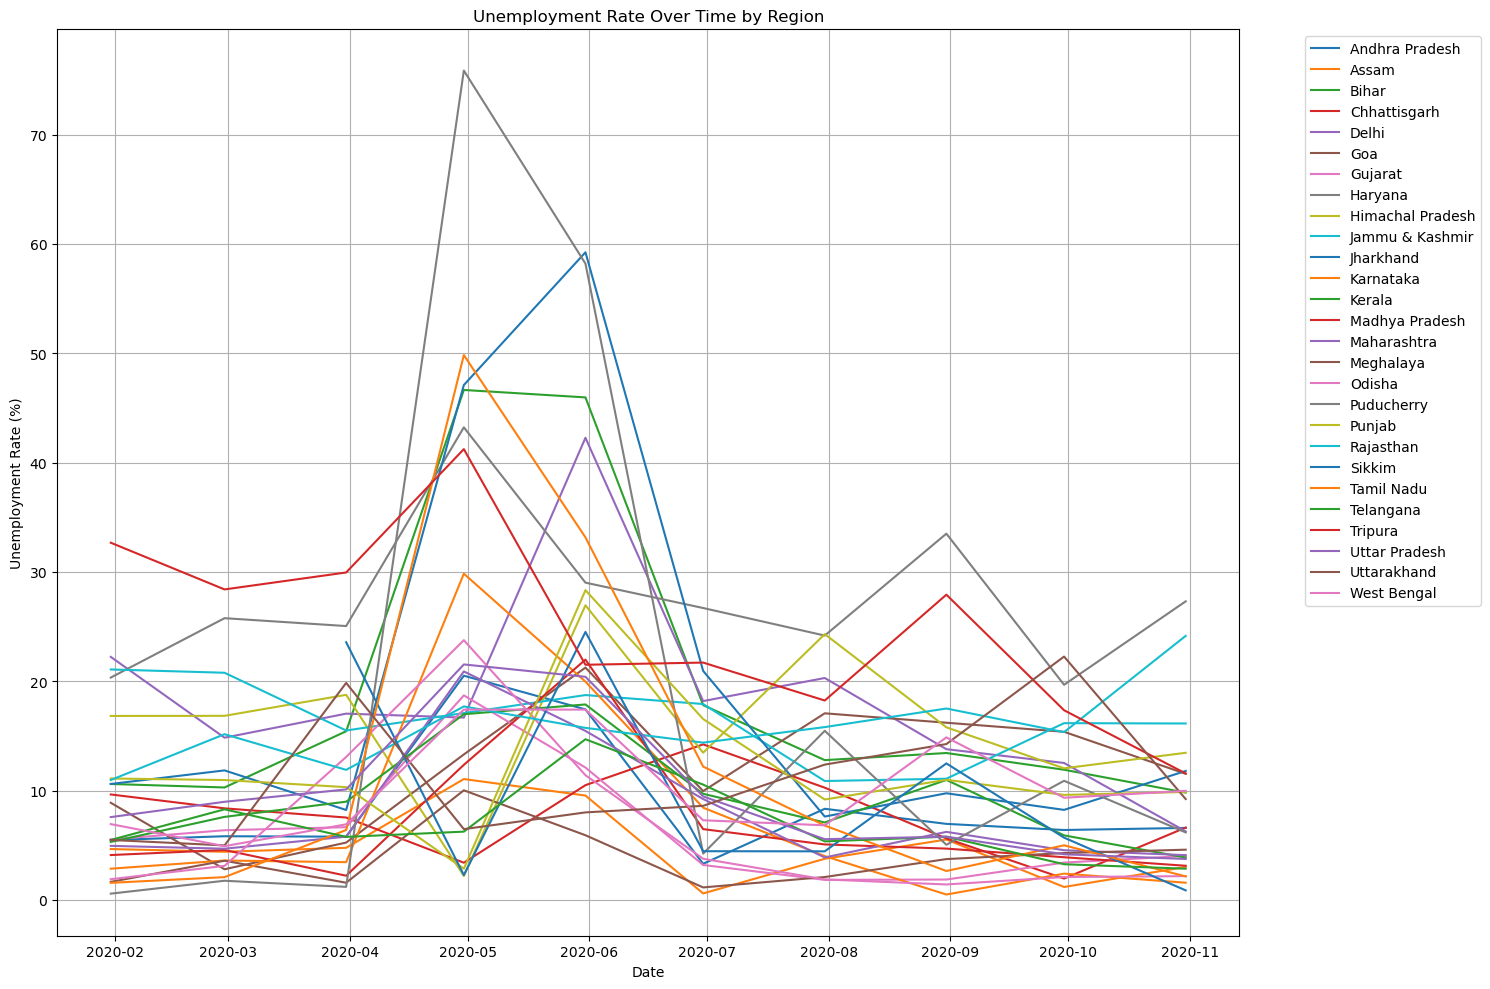

In [8]:
plt.figure(figsize=(15, 10))
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    plt.plot(region_data.index, region_data['Estimated Unemployment Rate (%)'], label=region)
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


# average unemployment rate before and during Covid-19

In [9]:
covid_start = pd.to_datetime('2020-03-01')
pre_covid_avg = df[df.index < covid_start]['Estimated Unemployment Rate (%)'].mean()
during_covid_avg = df[df.index >= covid_start]['Estimated Unemployment Rate (%)'].mean()

print(f"Average unemployment rate before Covid-19: {pre_covid_avg:.2f}%")
print(f"Average unemployment rate during Covid-19: {during_covid_avg:.2f}%")
print(f"Percentage increase: {((during_covid_avg - pre_covid_avg) / pre_covid_avg * 100):.2f}%")


Average unemployment rate before Covid-19: 9.23%
Average unemployment rate during Covid-19: 12.96%
Percentage increase: 40.43%


# Heatmap of unemployment rates by region

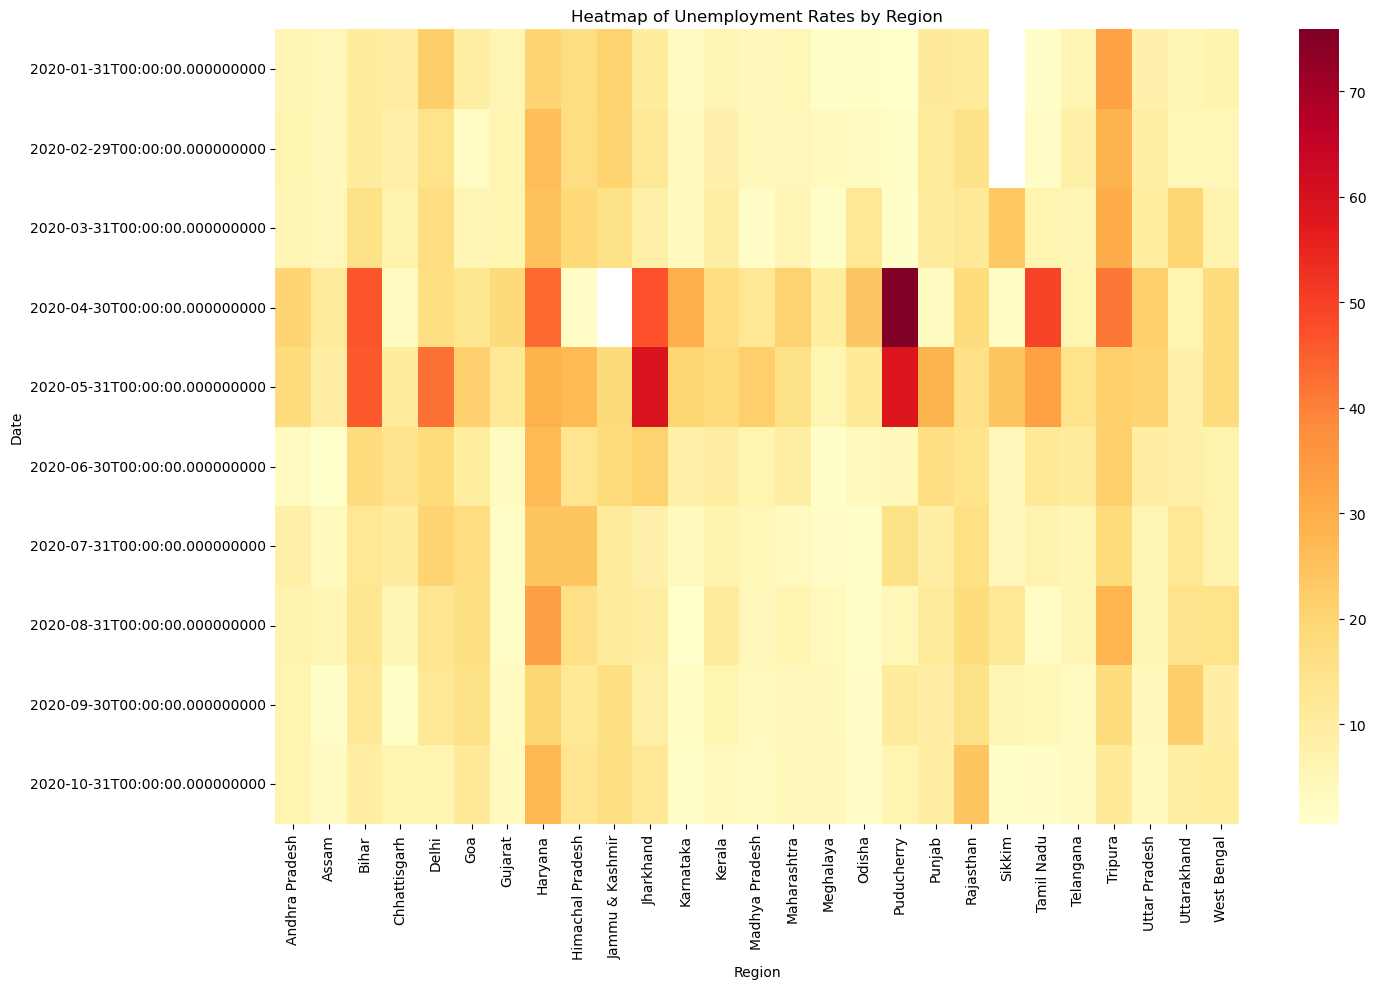

In [10]:
plt.figure(figsize=(15, 10))
pivot_df = df.pivot(columns='Region', values='Estimated Unemployment Rate (%)')
sns.heatmap(pivot_df, cmap='YlOrRd', annot=False)
plt.title('Heatmap of Unemployment Rates by Region')
plt.tight_layout()
plt.show()


# Heatmap of unemployment rates by region

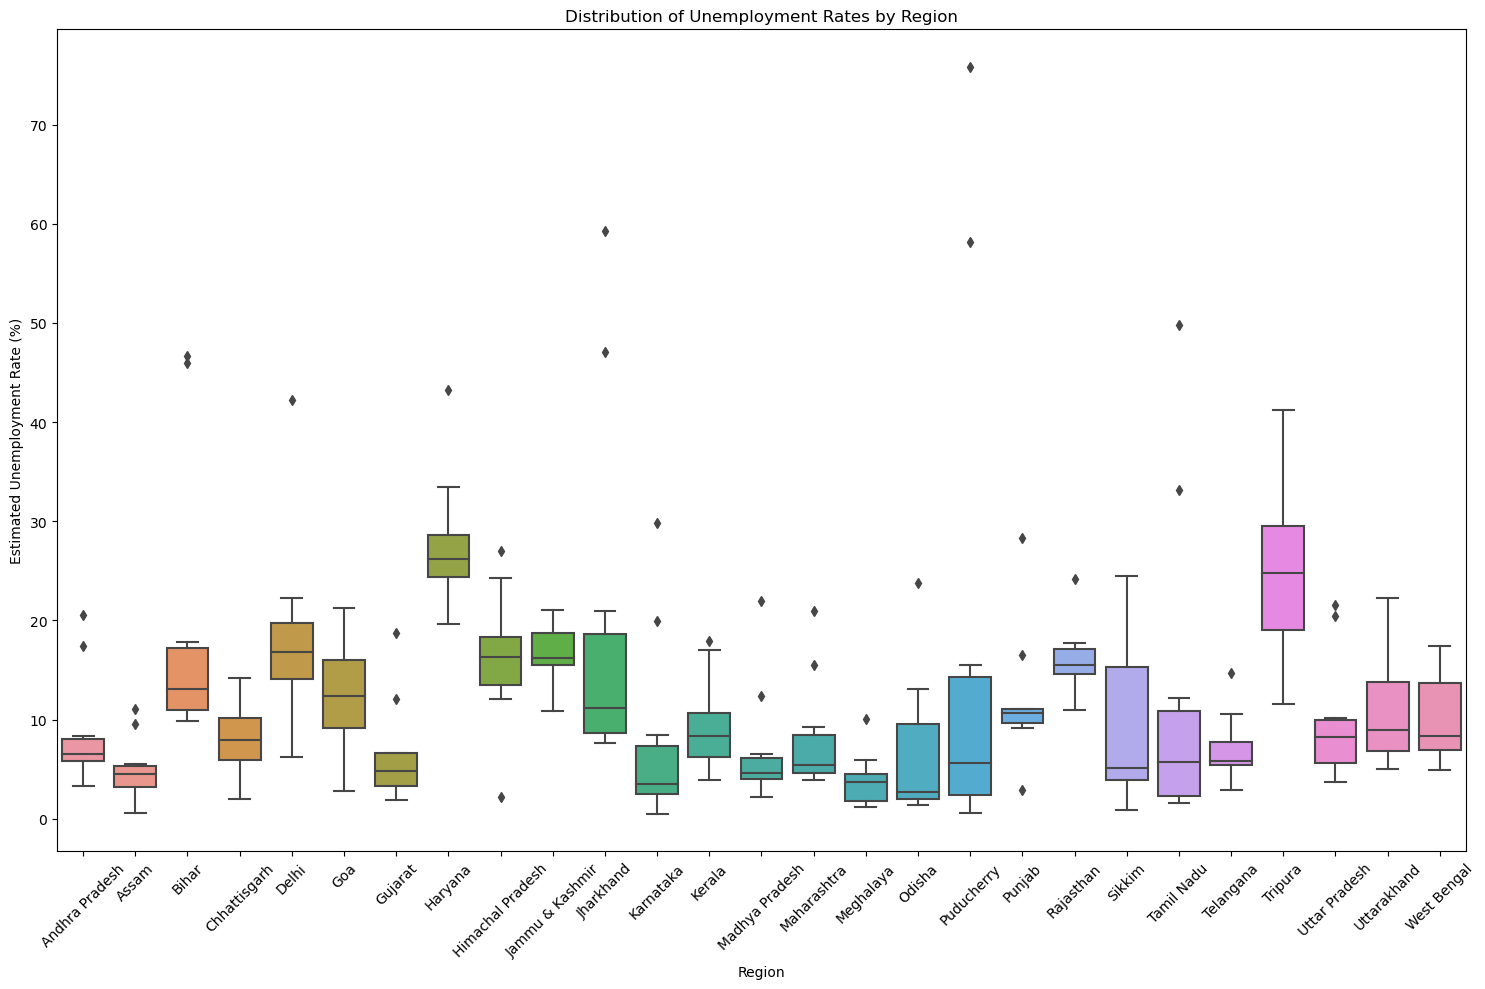

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Distribution of Unemployment Rates by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# scatter plot of unemployment rates by region

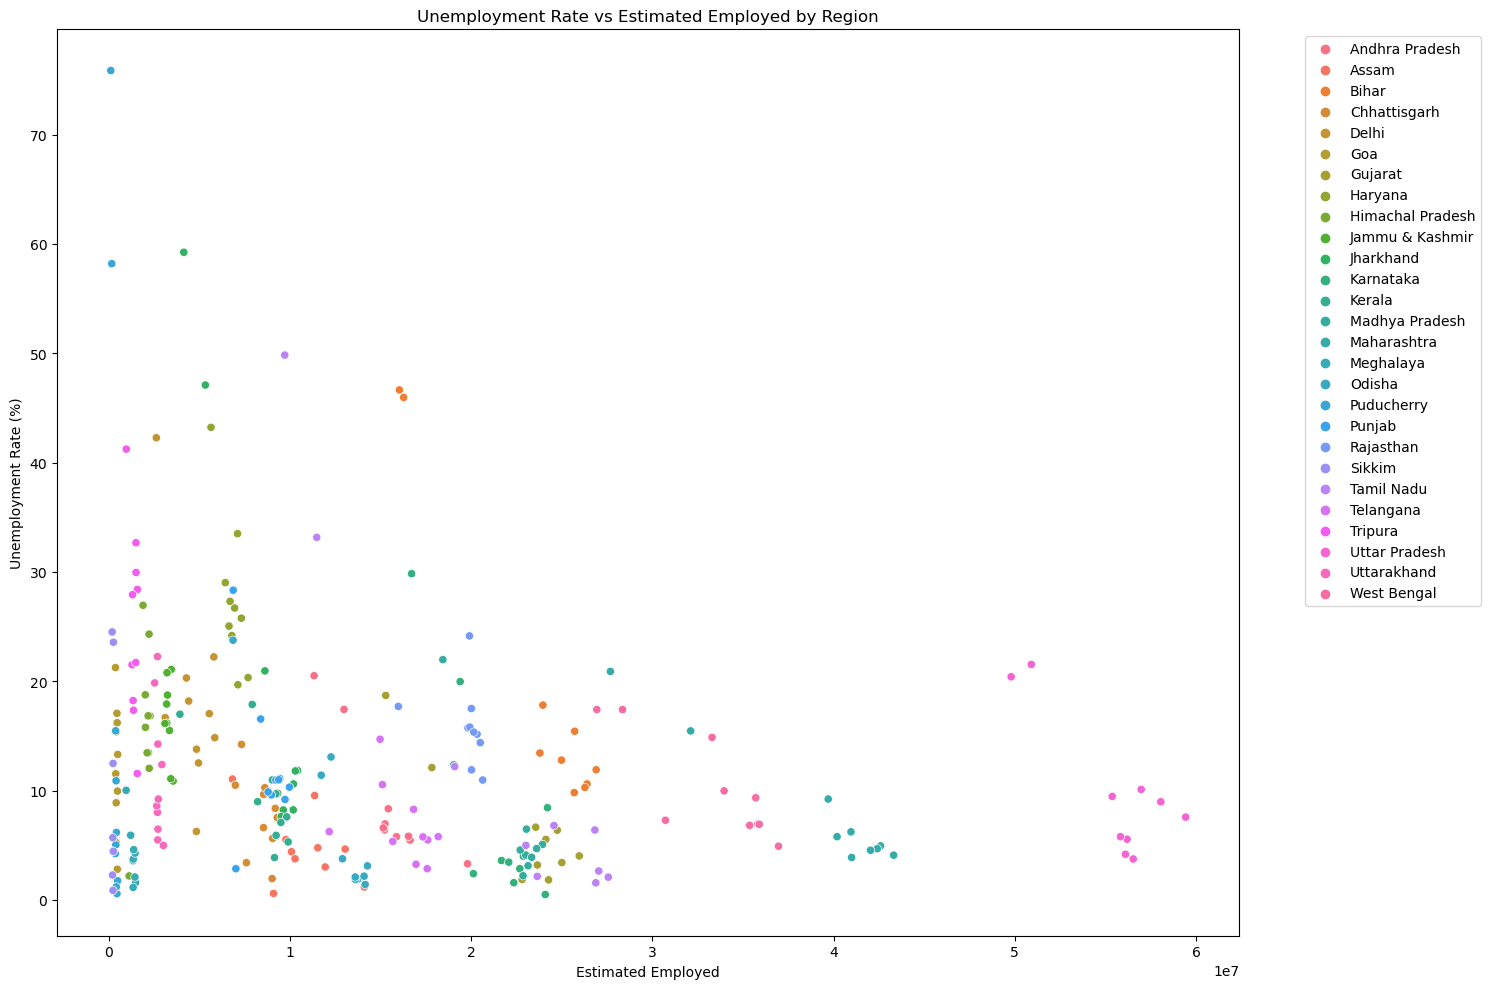

In [12]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Unemployment Rate vs Estimated Employed by Region')
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Box plot of unemployment rates by region

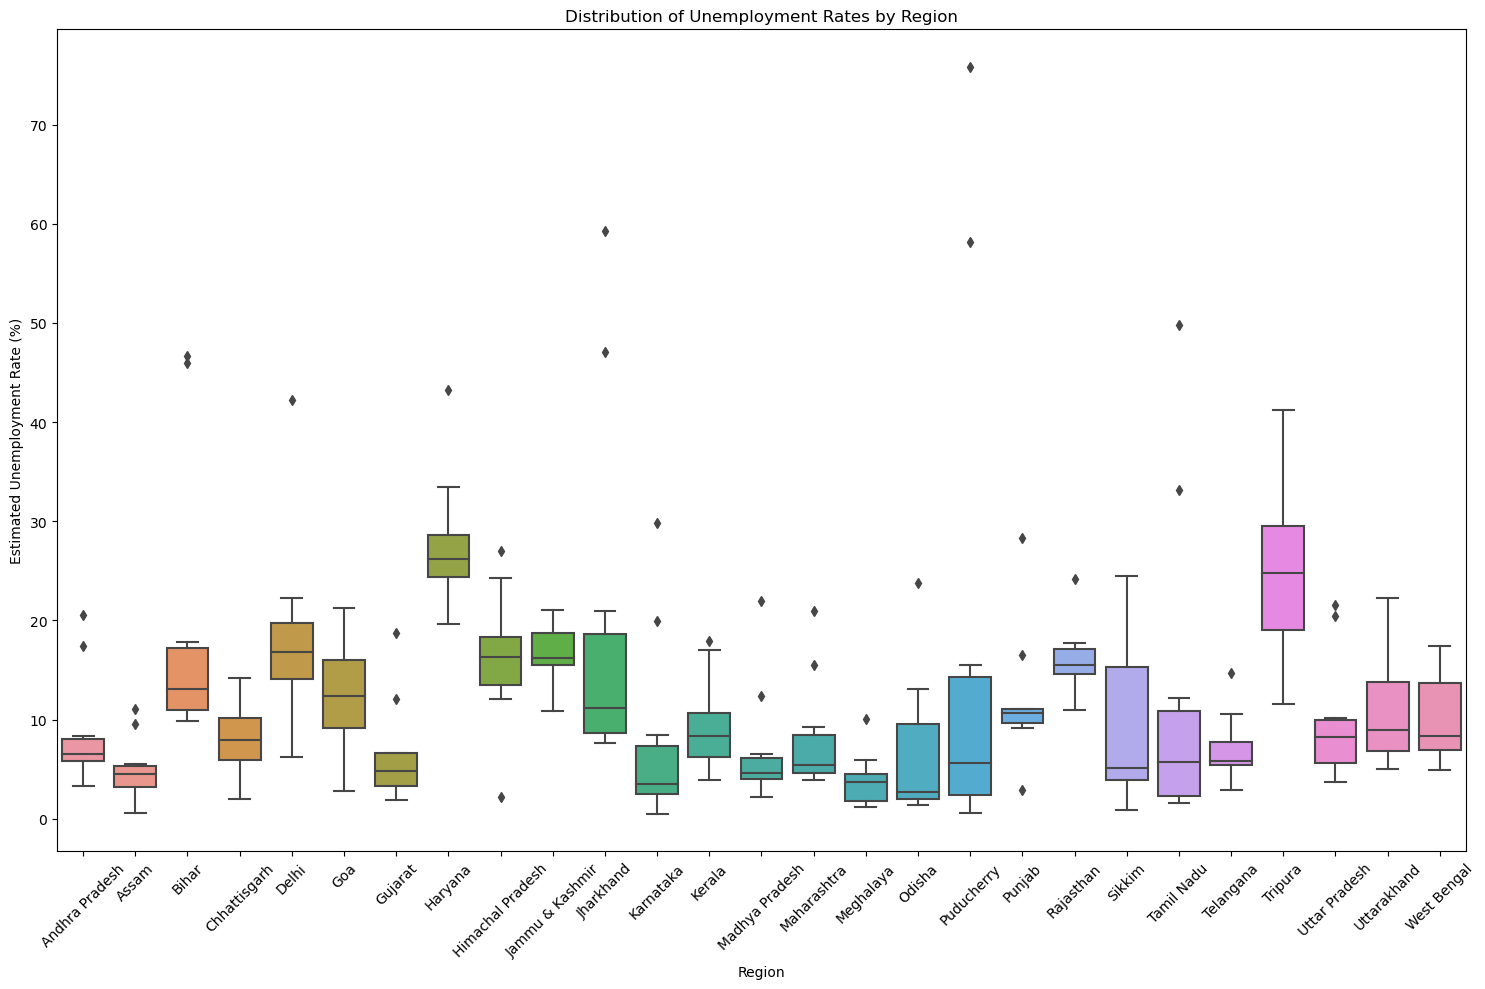

In [13]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Distribution of Unemployment Rates by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()